Autor: <strong>Patrick Anderson Matias de Araújo</strong></br>
R.A.: <strong>217144</strong>

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [116]:
base = pd.read_csv("layoffs.csv", low_memory=False)

In [117]:
base[base.duplicated(keep = 'first')].shape

(1, 9)

In [118]:
base = base.drop_duplicates(keep= 'first', ignore_index = True)
print(base.shape)
base.head()

(1585, 9)


,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,Amazon,Seattle,Retail,10000.0,0.03,2022-11-16,IPO,United States,108.0
1,Asana,SF Bay Area,Other,180.0,0.09,2022-11-15,IPO,United States,453.0
2,Protocol,SF Bay Area,Media,60.0,1.00,2022-11-15,Acquired,United States,NaN
3,Nirvana Money,Miami,Finance,NaN,1.00,2022-11-15,Unknown,United States,NaN
4,Sema4,Stamford,Healthcare,500.0,NaN,2022-11-14,IPO,United States,791.0


In [119]:
base.describe()

,total_laid_off,percentage_laid_off,funds_raised
count,1138.000000,1057.000000,1480.000000
mean,199.391916,0.278806,899.148848
std,587.319092,0.267766,6645.268839
min,3.000000,0.000000,0.000000
25%,30.000000,0.100000,42.000000
50%,70.000000,0.200000,123.000000
75%,150.000000,0.330000,358.250000
max,11000.000000,1.000000,121900.000000


In [120]:
base.dtypes

company                 object
location                object
industry                object
total_laid_off         float64
percentage_laid_off    float64
date                    object
stage                   object
country                 object
funds_raised           float64
dtype: object

In [121]:
pd.isnull(base).sum()[pd.isnull(base).sum() > 0]

industry                 3
total_laid_off         447
percentage_laid_off    528
stage                    4
funds_raised           105
dtype: int64

In [122]:
base = base.fillna("0")

<h2>Histograma</h2>

Text(0.5, 1.0, 'Total of laid off')

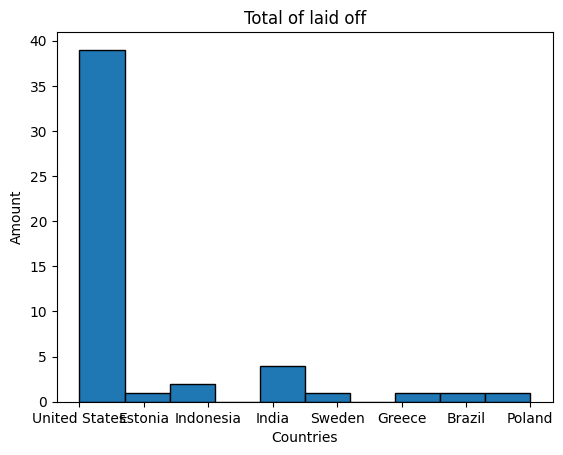

In [174]:
#print(type(base['total_laid_off']))

lista = base['country'].tolist()
plt.hist(lista[:50], edgecolor='black')
#plt.hist(lista[:100], bins=5, rwidth=0.5, edgecolor='black')
plt.ylabel('Amount')
plt.xlabel('Countries')
plt.title('Total of laid off')

<h2>Gráfico de pizza</h2>

In [89]:
def func(pct):
  return "{:1.1f}%".format(pct)

In [141]:
qtdAlunos = base['country'].count()
print(qtdAlunos)

1585


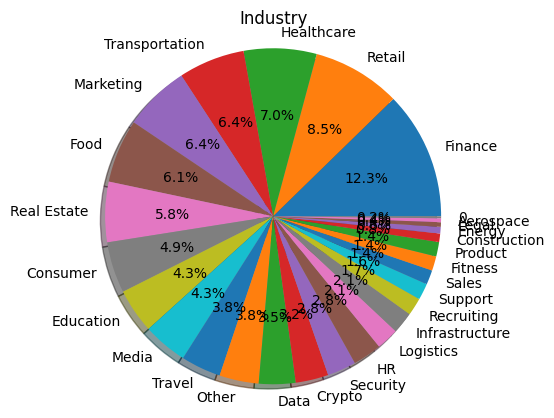

In [176]:
alunosPeriodos = base['industry'].value_counts()

values=alunosPeriodos.tolist()

labels=alunosPeriodos.keys().tolist()

plt.pie(values, labels=labels, autopct=lambda pct: func(pct), explode=None, shadow=True)
plt.title('Industry')
plt.axis('equal')
plt.show()

<h2><i>Scatter Plot</i></h2>

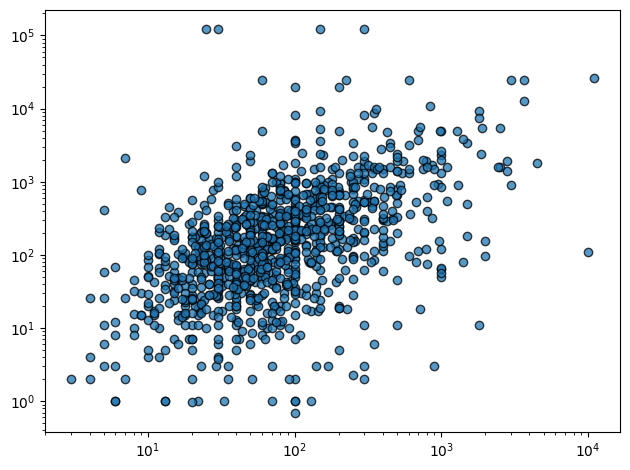

In [145]:
plt.scatter(base['total_laid_off'], base['funds_raised'], edgecolor='black', linewidth=1, alpha=0.75)
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
plt.show()